# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [4]:
import os

In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [6]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

100% 1.90M/1.90M [00:01<00:00, 2.12MB/s]
100% 1.90M/1.90M [00:01<00:00, 1.87MB/s]


In [7]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [8]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [9]:
import pandas as pd

In [10]:
raw_df = pd.read_csv(train_fname, sep = '\t')

In [11]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [12]:
test_df = pd.read_csv(test_fname, sep = '\t')

In [13]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [14]:
sub_df = pd.read_csv(sub_fname)

In [15]:
sub_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


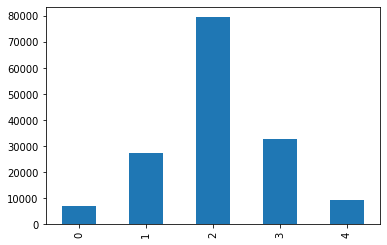

In [16]:
raw_df.Sentiment.value_counts().sort_index().plot(kind = 'bar')

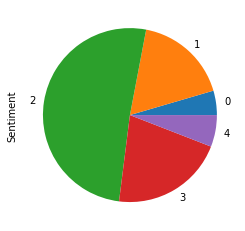

In [17]:
raw_df.Sentiment.value_counts(normalize = 'True').sort_index().plot(kind = 'pie')

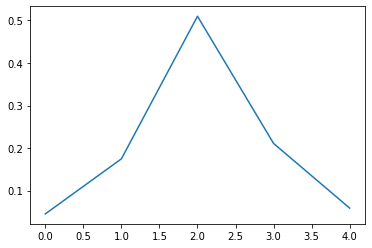

In [18]:
raw_df.Sentiment.value_counts(normalize = 'True').sort_index().plot(kind = 'line')

Summarize your insights and learnings from the dataset below:

* `The plot is a gaussian curve with value of 2 being the most rated`
* `From the curve we can say that most of the phrases are neutral`
* `There are very less number of phrases which are either too positive or too negative`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.stem.snowball import SnowballStemmer

In [22]:
stemmer = SnowballStemmer(language = 'english')

In [23]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [24]:
tokenize('The boy who lived, come to die')

['the', 'boy', 'who', 'live', 'come', 'to', 'die']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')

In [27]:
", ".join(eng_stopwords[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [28]:
selected_stopwords = eng_stopwords[:115]

In [29]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = selected_stopwords, ngram_range = (1, 2), max_features = 2000)

In [30]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f3092e47c20>)

In [31]:
len(vectorizer.vocabulary_)

2000

In [32]:
vectorizer.get_feature_names_out()[:100]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [33]:
inputs = vectorizer.transform(raw_df.Phrase)

In [34]:
inputs.shape

(156060, 2000)

In [35]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [37]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [38]:
TRAIN_SIZE = 110_000

In [39]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [40]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [41]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

### Train Logistic Regression Model



In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [45]:
train_preds = model.predict(train_inputs)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(train_targets, train_preds)

0.6381818181818182

In [48]:
val_preds = model.predict(val_inputs)

In [49]:
accuracy_score(val_targets, val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [50]:
small_df = raw_df.sample(20)
small_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
134267,134268,7245,could have turned this into an Argentine retre...,2
94862,94863,4950,Tries so hard to be quirky and funny that the ...,1
26053,26054,1192,The heat,2
79942,79943,4119,Uwe,2
40472,40473,1936,-LRB- Gulpilil -RRB- is a commanding screen pr...,3


In [51]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [52]:
small_preds = model.predict(small_inputs)

In [53]:
small_preds

array([3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2, 3, 2, 4])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [54]:
test_preds = model.predict(test_inputs)

In [55]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [56]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [57]:
sub_df.Sentiment = test_preds

In [58]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [59]:
sub_df.to_csv('submission.csv', index = None)

## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model_decisionTree = DecisionTreeClassifier(max_depth = 4500, max_features = 2000, max_leaf_nodes = 5000, criterion = 'gini', splitter = 'random')

In [62]:
model_decisionTree.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=4500, max_features=2000, max_leaf_nodes=5000,
                       splitter='random')

In [63]:
decision_tree_preds = model_decisionTree.predict(train_inputs)

In [64]:
accuracy_score(train_targets, decision_tree_preds)

0.7183181818181819

In [65]:
val_decision_tree_preds = model_decisionTree.predict(val_inputs)

In [66]:
accuracy_score(val_targets, val_decision_tree_preds)

0.5476118106817195

In [67]:
test__tree_preds = model_decisionTree.predict(test_inputs)

In [68]:
sub_df.Sentiment = test__tree_preds

In [69]:
sub_df.to_csv('submission2.csv', index = None)

### Model 2

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
model_NB = MultinomialNB(alpha = 0.5, fit_prior = True)

In [72]:
model_NB.fit(train_inputs, train_targets)

MultinomialNB(alpha=0.5)

In [73]:
model_NB_preds = model_NB.predict(train_inputs)

In [74]:
accuracy_score(train_targets, model_NB_preds)

0.5865181818181818

In [75]:
val_NB_preds = model_NB.predict(val_inputs)

In [76]:
accuracy_score(val_targets, val_NB_preds)

0.5443334780720799

In [77]:
test__NB_preds = model_NB.predict(test_inputs)

In [78]:
sub_df.Sentiment = test__NB_preds

In [79]:
sub_df.to_csv('submission3.csv', index = None)

### Model 3

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model_rf = RandomForestClassifier(n_estimators = 500, max_depth = 4500, max_features = 2000, max_leaf_nodes = 5000, criterion = 'entropy')

In [82]:
model_rf.fit(train_inputs, train_targets)

RandomForestClassifier(criterion='entropy', max_depth=4500, max_features=2000,
                       max_leaf_nodes=5000, n_estimators=500)

In [83]:
model_rf_preds = model_rf.predict(train_inputs)

In [84]:
accuracy_score(train_targets, model_rf_preds)

0.7442090909090909

In [85]:
val_rf_preds = model_rf.predict(val_inputs)

In [86]:
accuracy_score(val_targets, val_rf_preds)

0.5584455058619192

In [87]:
test__rf_preds = model_rf.predict(test_inputs)

In [88]:
sub_df.Sentiment = test__NB_preds

In [89]:
sub_df.to_csv('submission4.csv', index = None)

Best Model:

Decision Tree
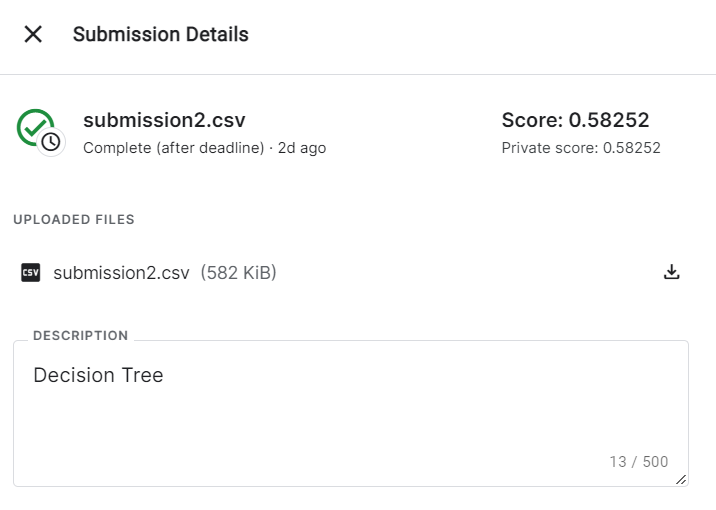

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
